In [98]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [99]:
ROOT_DIR = '/notebooks/maskrcnn-benchmark/datasets/coco/human_parsing'
annFile='{}/Human_parsing_train2018.json'.format(ROOT_DIR)
print(annFile)

/notebooks/maskrcnn-benchmark/datasets/coco/human_parsing/Human_parsing_train2018.json


In [100]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


In [101]:
# display human parsing categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('Human_parsing categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('Human_parsing supercategories: \n{}'.format(' '.join(nms)))

Human_parsing categories: 
person bicycle

Human_parsing supercategories: 
person vehicle


In [102]:
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds )
imgIds = coco.getImgIds(imgIds = ['2500_12']) 
img = coco.loadImgs(imgIds)[0] 
print(img,catIds)

{'id': '2500_12', 'file_name': '2500_12.jpg', 'width': 316, 'height': 600, 'date_captured': '2019-02-06 21:24:53.359201', 'license': 1, 'coco_url': '', 'flickr_url': ''} [1]


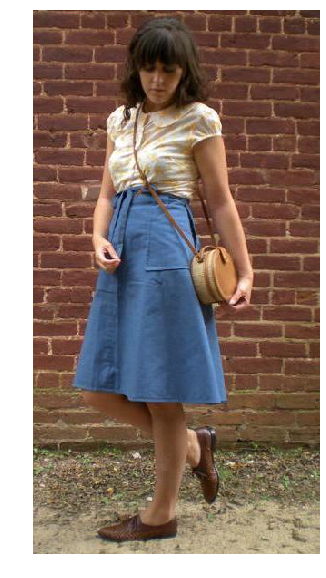

In [103]:
I = io.imread('/notebooks/maskrcnn-benchmark/datasets/coco/human_parsing/JPEGImages/%s'%(img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

2500_12 [1] [232]


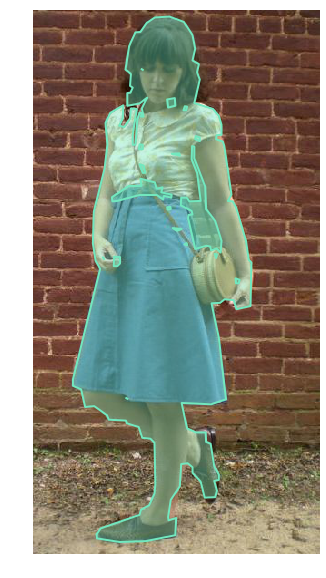

In [104]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
imglist = []
imglist.append(img['id'])
annIds = coco.getAnnIds(imgIds=imglist, catIds=catIds, iscrowd=None)
print(img['id'],catIds,annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)